In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [2]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [3]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [4]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   tb         300 non-null    int64         
 4   longitude  300 non-null    float64       
 5   latitude   300 non-null    float64       
 6   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 14.2+ KB


Merapihkan Data TB 2018-2023

In [5]:
import calendar

In [6]:
# Filter for years 2018-2022
df_tb = df_excel[(df_excel['year'] >= 2018) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT and month
tb_total = df_tb.groupby(['KABKOT', 'month'])['tb'].sum()
tb_total

KABKOT           month
JAKARTA BARAT    1        3404
                 2        2822
                 3        3223
                 4        3053
                 5        2812
                 6        2678
                 7        2851
                 8        2970
                 9        3086
                 10       3191
                 11       3231
                 12       2867
JAKARTA PUSAT    1        3100
                 2        2371
                 3        2598
                 4        2447
                 5        2199
                 6        2108
                 7        2473
                 8        2417
                 9        2348
                 10       2076
                 11       2090
                 12       1970
JAKARTA SELATAN  1        3086
                 2        2470
                 3        2809
                 4        2710
                 5        2376
                 6        2541
                 7        2793
                

Merapihkan Data Curah Hujan (tp) 2018-2023

In [7]:
df_tp = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/curah_hujan/dissolved_result_tp.csv')
df_tp = df_tp.drop(['Unnamed: 0'], axis=1)
print(df_tp.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'tp', 'time'], dtype='object')


In [8]:
# Filter for years 2018-2022
df_tp = df_tp[(df_tp['year'] >= 2018) & (df_tp['year'] <= 2022)]

# Group tp_mean by KABKOT and month
tp_mean = df_tp.groupby(['KABKOT', 'month'])['tp'].mean()
tp_mean

KABKOT           month
JAKARTA BARAT    1         9.264916
                 2        10.695420
                 3         7.989386
                 4         6.768114
                 5         3.957347
                 6         3.124164
                 7         1.948042
                 8         2.150414
                 9         2.775767
                 10        4.446980
                 11        5.661228
                 12        8.068726
JAKARTA PUSAT    1         9.626161
                 2        11.172359
                 3         8.444507
                 4         7.150132
                 5         3.940211
                 6         3.066727
                 7         1.797349
                 8         2.093010
                 9         2.708095
                 10        4.755655
                 11        6.440136
                 12        8.375961
JAKARTA SELATAN  1         9.639708
                 2        10.985248
                 3         8.769002
     

Merge Files

In [9]:
# Merge DataFrames on 'KABKOT', 'month', and 'time'
df_tb_tp = pd.merge(tb_total, tp_mean, on=['KABKOT', 'month'])
df_tb_tp

tb         tp
KABKOT          month                 
JAKARTA BARAT   1      3404   9.264916
                2      2822  10.695420
                3      3223   7.989386
                4      3053   6.768114
                5      2812   3.957347
                6      2678   3.124164
                7      2851   1.948042
                8      2970   2.150414
                9      3086   2.775767
                10     3191   4.446980
                11     3231   5.661228
                12     2867   8.068726
JAKARTA PUSAT   1      3100   9.626161
                2      2371  11.172359
                3      2598   8.444507
                4      2447   7.150132
                5      2199   3.940211
                6      2108   3.066727
                7      2473   1.797349
                8      2417   2.093010
                9      2348   2.708095
                10     2076   4.755655
                11     2090   6.440136
                12     1970   8.375961
JAKARTA SELATAN 1      3086   9.639708
                2      2470  10.985248
                3      2809   8.769002
                4      2710   7.474538
                5      2376   4.063996
                6      2541   3.169355
                7      2793   1.924254
                8      2691   2.416731
                9      2720   3.147362
                10     2477   5.367697
                11     2285   6.985544
                12     2155   8.764671
JAKARTA TIMUR   1      4791  10.028131
                2      3751  11.573100
                3      4836   9.167427
                4      4400   7.740387
                5      3831   4.121089
                6      3882   3.182487
                7      4265   1.765703
                8      4318   2.183894
                9      4573   2.930892
                10     3732   5.413112
                11     3475   7.529147
                12     3275   8.886482
JAKARTA UTARA   1      2541   9.644275
                2      1856  11.400957
                3      2181   8.154170
                4      2105   6.915590
                5      1941   3.982823
                6      1834   3.105375
                7      2035   1.742494
                8      2135   1.864948
                9      2135   2.533138
                10     1812   4.379896
                11     1811   6.028470
                12     1686   8.175812

In [10]:
df_tb_tp = df_tb_tp.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'tp':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [11]:
df_tb_tp

,KABKOT,month,tb,tp
0,JAKARTA BARAT,1,3404,9.264916
1,JAKARTA BARAT,2,2822,10.695420
2,JAKARTA BARAT,3,3223,7.989386
3,JAKARTA BARAT,4,3053,6.768114
4,JAKARTA BARAT,5,2812,3.957347
5,JAKARTA BARAT,6,2678,3.124164
6,JAKARTA BARAT,7,2851,1.948042
7,JAKARTA BARAT,8,2970,2.150414
8,JAKARTA BARAT,9,3086,2.775767
9,JAKARTA BARAT,10,3191,4.446980


In [12]:
df_tb_tp.shape

(60, 4)

In [13]:
#df_tb_tp.to_csv("/Users/Jia/Downloads/data_skripsi/a_overlay/tb_tp.csv")

Datetime edit for 'month'

In [14]:
import calendar

# Format for monthly graph
df_tb_tp['month'] = pd.to_datetime(df_tb_tp['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_tp = df_tb_tp.set_index('month').reset_index()

In [15]:
df_tb_tp

,month,KABKOT,tb,tp
0,January,JAKARTA BARAT,3404,9.264916
1,February,JAKARTA BARAT,2822,10.695420
2,March,JAKARTA BARAT,3223,7.989386
3,April,JAKARTA BARAT,3053,6.768114
4,May,JAKARTA BARAT,2812,3.957347
5,June,JAKARTA BARAT,2678,3.124164
6,July,JAKARTA BARAT,2851,1.948042
7,August,JAKARTA BARAT,2970,2.150414
8,September,JAKARTA BARAT,3086,2.775767
9,October,JAKARTA BARAT,3191,4.446980


Overlay layer plot for TB and TP

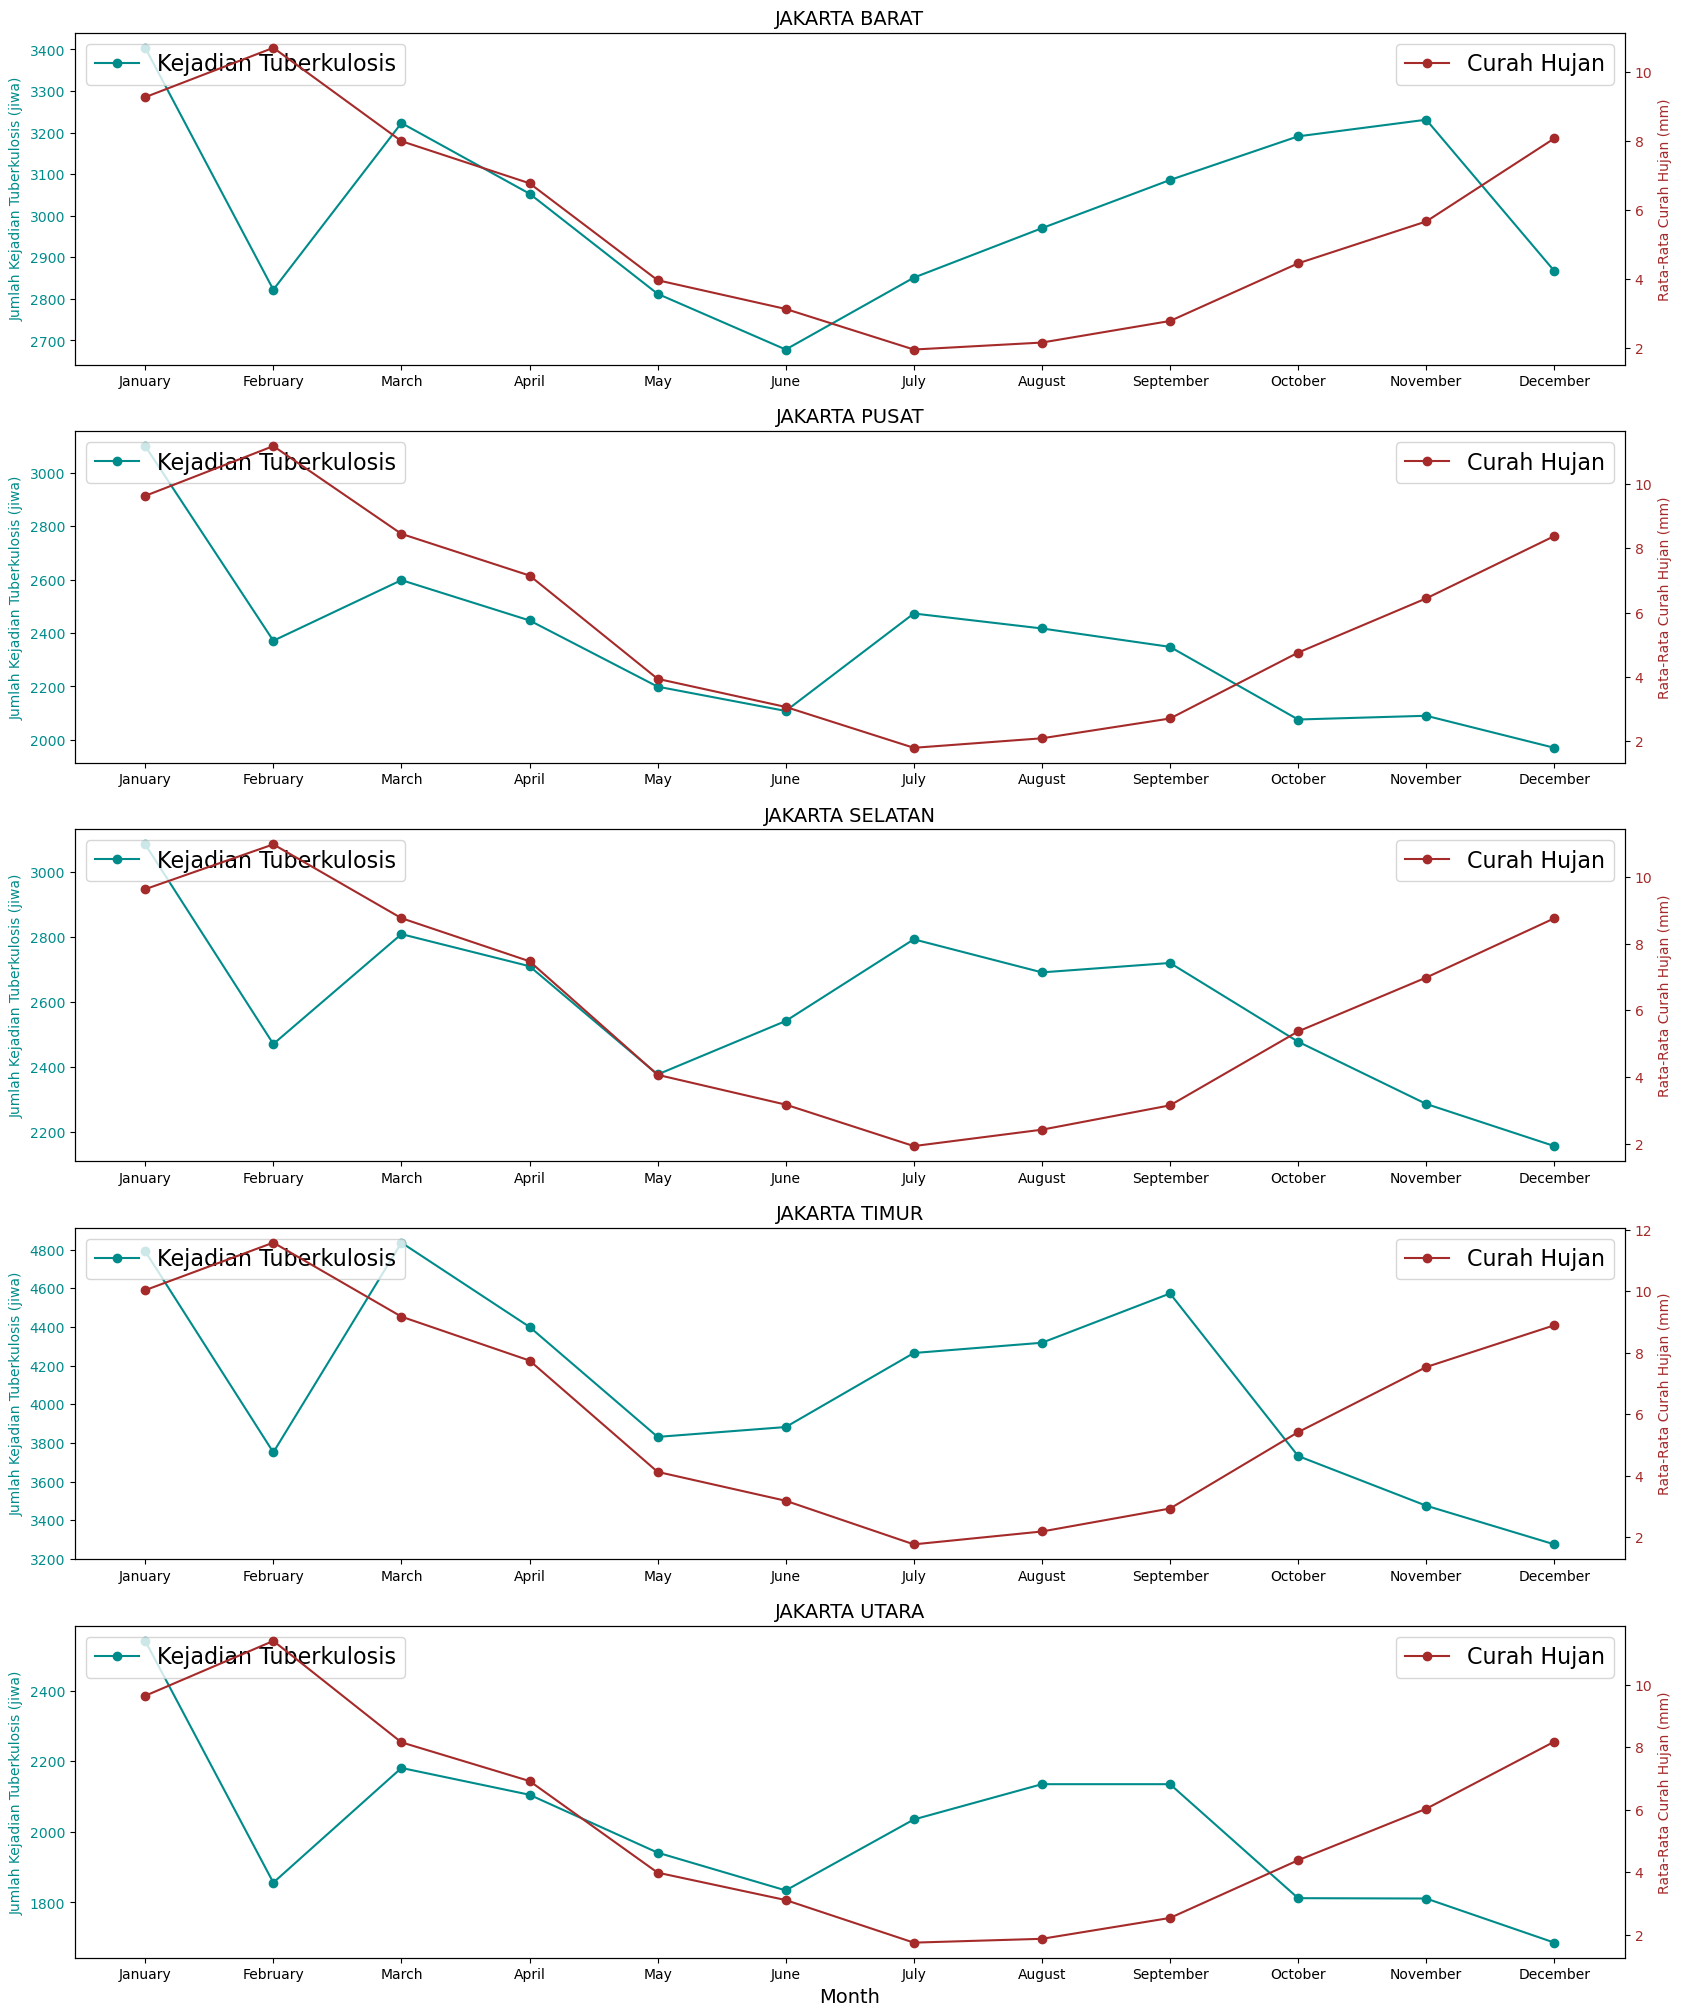

In [16]:
indicators = ['tb', 'tp']

# Group data by KABKOT
grouped_data = df_tb_tp.groupby('KABKOT')

# Plot time series for 'tb' and 'so2' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['tp']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Curah Hujan', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Curah Hujan (mm)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()